In [51]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
clicks_df = pd.read_csv('stud_dates_click.csv')
clicks_df

,code_module,code_presentation,id_student,final_result,-25,-24,-23,-22,-21,-20,...,260,261,262,263,264,265,266,267,268,269
0,AAA,2013J,11391,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAA,2013J,28400,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAA,2013J,30268,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAA,2013J,31604,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,AAA,2013J,32885,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,Fail,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32589,GGG,2014J,2645731,Distinction,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32590,GGG,2014J,2648187,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32591,GGG,2014J,2679821,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
stud_df = pd.read_csv('./data/studentInfo.csv')
stud_df

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [5]:
# merge three table for further processing
data = pd.merge(stud_df, clicks_df, on=['code_module', 'code_presentation', 'id_student', 'final_result'], how='inner')
data

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,261,262,263,264,265,266,267,268,269,final_marks
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.40
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.40
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,76.30
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.11
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.67
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.50


In [6]:
# change the label of target
data['final_result'] = data['final_result'].map({'Pass':1, 'Distinction':1, 'Withdrawn':0, 'Fail':0})

# split the data into train and test
dataX = data.drop(columns='final_result')
target = data['final_result']
X_train, X_test, y_train, y_test = train_test_split(dataX, target, test_size=0.2, stratify=target)

In [29]:
def prepare_data(X, rule='W'):
    
    #clicks data
    cols = [str(i) for i in range(-25, 245)]
    X1 = X[cols]
    X1 = X1.T
    X1.index = pd.date_range(start='1/1/2014', periods=270)
    X1 = X1.resample(rule).sum()
    X1 = X1.T
    
    # demographic data
    gen_cols = ['gender', 'region', 'highest_education', 'imd_band', 
        'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability']
    cat_cols = ['gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability']
    X2 = X[gen_cols]
    for col in cat_cols:
        X2 = pd.concat([X2, pd.get_dummies(X2[col], prefix=col, prefix_sep='_')], axis=1)
        X2.drop(columns=col, inplace=True)
        
    return X1, X2

In [30]:
# prepare the data
X_train_clicks, X_train_demographics = prepare_data(X_train)
X_test_clicks, X_test_demographics = prepare_data(X_test)

# print stastic
print('Train Data:', X_train_clicks.shape, X_train_demographics.shape)
print('Test Data: ', X_test_clicks.shape, X_test_demographics.shape)
print('Train target count:', Counter(y_train))
print('Test target count:', Counter(y_test))

Train Data: (26074, 39) (26074, 37) (26074, 1)
Test Data:  (6519, 39) (6519, 37) (6519, 1)
Train target count: Counter({0: 13766, 1: 12308})
Test target count: Counter({0: 3442, 1: 3077})


In [92]:
from tensorflow.keras.layers import Dense, Input, Conv1D, BatchNormalization, AveragePooling1D, Flatten, Add, Concatenate, Multiply, Softmax, LSTM
from tensorflow.keras import Sequential, Model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.activations import sigmoid

# First compare ANN, CNN and LSTM model

In [40]:
# Define ann model
def ann_model():
    ann = Sequential()
    ann.add(Input(shape=(X_train_clicks.shape[1], )))
    ann.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    ann.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    ann.add(Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    ann.add(Dense(1, activation='sigmoid'))
    # compile the model
    ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return ann

# define cnn model
def cnn_model():
    cnn = Sequential()
    cnn.add(Input(shape=(X_train_clicks.shape[1], 1)))
    cnn.add(Conv1D(16, kernel_size=2, activation='relu'))
    cnn.add(BatchNormalization())
    cnn.add(AveragePooling1D(2))
    cnn.add(Conv1D(32, kernel_size=2, activation='relu'))
    cnn.add(BatchNormalization())
    cnn.add(AveragePooling1D(2))
    cnn.add(Flatten())
    cnn.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    cnn.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    cnn.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    cnn.add(Dense(1,  activation='sigmoid'))
    # compile the model
    cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return cnn

# define lstm model
def lstm_model():
    lstm = Sequential()
    lstm.add(LSTM(25, activation='relu', input_shape=(X_train_clicks.shape[1],1), return_sequences=True, kernel_regularizer=regularizers.l2(0.01)))
    lstm.add(LSTM(10, activation='relu', return_sequences=False, kernel_regularizer=regularizers.l2(0.01)))
    lstm.add(Dense(1, activation='sigmoid'))
    # compile the model
    lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return lstm

In [33]:
def visualize_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['Train', 'Validation'])
    plt.show()

# ANN

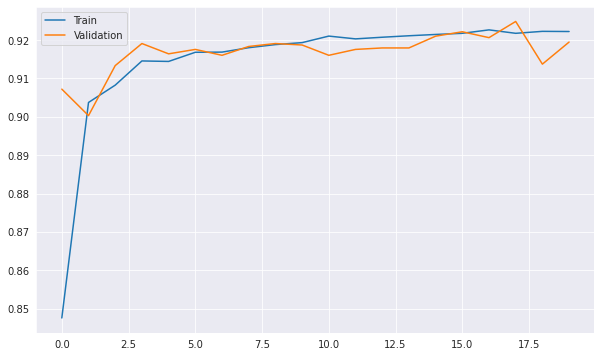

Accuracy:  0.9211535511581531
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      3084
           1       0.97      0.87      0.92      3435

    accuracy                           0.92      6519
   macro avg       0.92      0.92      0.92      6519
weighted avg       0.93      0.92      0.92      6519



,precision,recall,f1-score,support,accuracy,model
0,0.873329,0.974708,0.921238,3084.0,0.921154,ANN
1,0.974651,0.873071,0.921069,3435.0,0.921154,ANN


In [39]:
# model based on only clicks
path = 'model/ann_model.h5'
callback = ModelCheckpoint(path, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

ann = ann_model()
hist1 = ann.fit(X_train_clicks, y_train, validation_split=0.1, epochs=20, batch_size=30, verbose=0, callbacks=[callback])
visualize_loss(hist1)

# predict
ann.load_weights(path)
predict = ann.predict(X_test_clicks)
predict1 = np.where(predict>0.5, 1, 0)
print('Accuracy: ', accuracy_score(predict1, y_test))
print(classification_report(predict1, y_test))

# store in dataframe
result = pd.DataFrame(classification_report(predict1, y_test,output_dict=True)).T
result['accuracy'] = result.loc['accuracy', 'precision']
result = result.iloc[:2, :]
result['model'] = 'ANN'
result

# CNN

In [35]:
# Convert the data into 3-dimensional
X_train_clicks_2 = X_train_clicks.to_numpy().reshape(X_train_clicks.shape[0], X_train_clicks.shape[1], 1)
X_test_clicks_2 = X_test_clicks.to_numpy().reshape(X_test_clicks.shape[0], X_test_clicks.shape[1], 1)

# convert data into 3-d
X_train_demographics_2 = X_train_demographics.to_numpy().reshape(X_train_demographics.shape[0], X_train_demographics.shape[1], 1)
X_test_demographics_2 = X_test_demographics.to_numpy().reshape(X_test_demographics.shape[0], X_test_demographics.shape[1], 1)

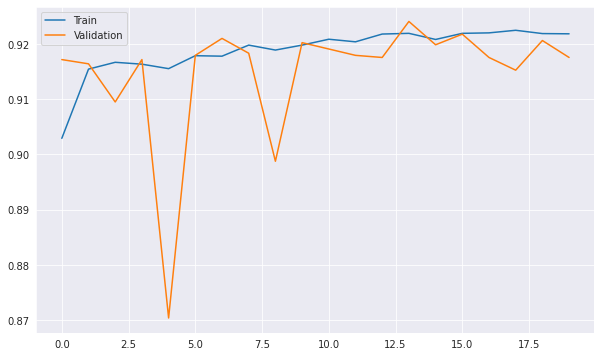

Accuracy:  0.9217671421997239
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      3094
           1       0.97      0.87      0.92      3425

    accuracy                           0.92      6519
   macro avg       0.92      0.92      0.92      6519
weighted avg       0.93      0.92      0.92      6519



,precision,recall,f1-score,support,accuracy,model
0,0.873329,0.974708,0.921238,3084.0,0.921154,ANN
1,0.974651,0.873071,0.921069,3435.0,0.921154,ANN
0,0.875363,0.973820,0.921971,3094.0,0.921767,CNN
1,0.973676,0.874745,0.921563,3425.0,0.921767,CNN


In [41]:
# model based on only clicks
path = 'model/cnn_model.h5'
callback = ModelCheckpoint(path, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

cnn = cnn_model()
hist2 = cnn.fit(X_train_clicks_2, y_train, validation_split=0.1, epochs=20, batch_size=30, verbose=0, callbacks=[callback])
visualize_loss(hist2)

# predict
cnn.load_weights(path)
predict= cnn.predict(X_test_clicks_2)
predict2 = np.where(predict>0.5, 1, 0)
print('Accuracy: ', accuracy_score(predict2, y_test))
print(classification_report(predict2, y_test))

# store and concat with result
r = pd.DataFrame(classification_report(predict2, y_test,output_dict=True)).T
r['accuracy'] = r.loc['accuracy', 'precision']
r = r.iloc[:2, :]
r['model'] = 'CNN'

result = pd.concat([result, r])
result

# LSTM

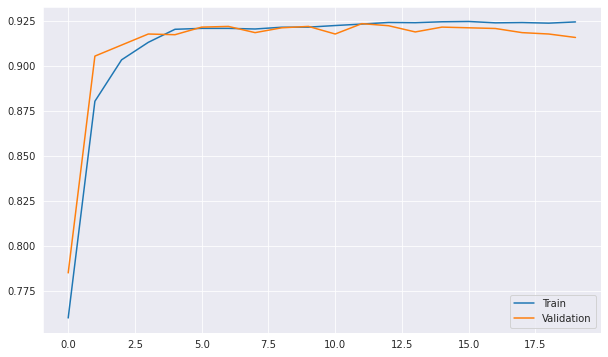

Accuracy:  0.9210001533977604
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      3043
           1       0.98      0.87      0.92      3476

    accuracy                           0.92      6519
   macro avg       0.92      0.92      0.92      6519
weighted avg       0.93      0.92      0.92      6519



,precision,recall,f1-score,support,accuracy,model
0,0.873329,0.974708,0.921238,3084.0,0.921154,ANN
1,0.974651,0.873071,0.921069,3435.0,0.921154,ANN
0,0.875363,0.973820,0.921971,3094.0,0.921767,CNN
1,0.973676,0.874745,0.921563,3425.0,0.921767,CNN
0,0.867228,0.980940,0.920586,3043.0,0.921000,LSTM
1,0.981150,0.868527,0.921410,3476.0,0.921000,LSTM


In [42]:
# model based on only clicks
path = 'model/lstm_model.h5'
callback = ModelCheckpoint(path, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

lstm = lstm_model()
hist3 = lstm.fit(X_train_clicks_2, y_train, validation_split=0.1, epochs=20, batch_size=30, verbose=0, callbacks=[callback])
visualize_loss(hist3)

# predict
lstm.load_weights(path)
predict = lstm.predict(X_test_clicks_2)
predict3 = np.where(predict>0.5, 1, 0)
print('Accuracy: ', accuracy_score(predict3, y_test))
print(classification_report(predict3, y_test))

# store and concat with result
r = pd.DataFrame(classification_report(predict3, y_test,output_dict=True)).T
r['accuracy'] = r.loc['accuracy', 'precision']
r = r.iloc[:2, :]
r['model'] = 'LSTM'

result = pd.concat([result, r])
result

Text(0, 0.5, 'Training Accuracy')

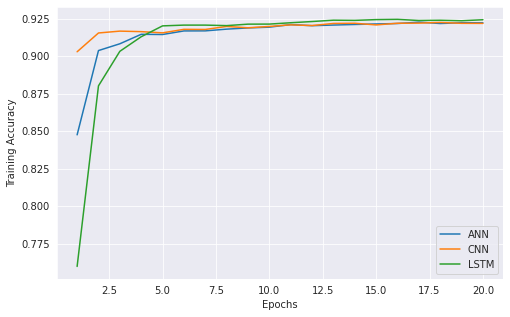

In [43]:
epochs = list(range(1, 21))
plt.figure(figsize=(8, 5))
plt.plot(epochs, hist1.history['accuracy'], label='ANN')
plt.plot(epochs, hist2.history['accuracy'], label='CNN')
plt.plot(epochs, hist3.history['accuracy'], label='LSTM')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')

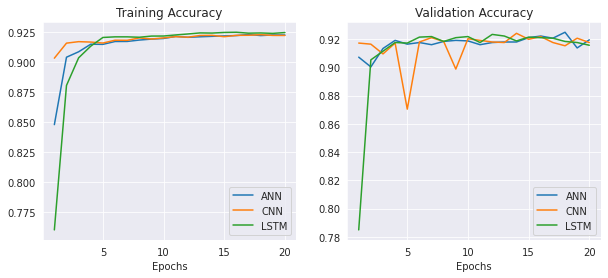

In [59]:
# sns.set_style('whitegrid')
epochs = list(range(1, 21))
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(epochs, hist1.history['accuracy'], label='ANN')
plt.plot(epochs, hist2.history['accuracy'], label='CNN')
plt.plot(epochs, hist3.history['accuracy'], label='LSTM')
plt.legend()
plt.xlabel('Epochs')
plt.title('Training Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs, hist1.history['val_accuracy'], label='ANN')
plt.plot(epochs, hist2.history['val_accuracy'], label='CNN')
plt.plot(epochs, hist3.history['val_accuracy'], label='LSTM')
plt.legend()
plt.xlabel('Epochs')
plt.title('Validation Accuracy')
plt.savefig('result/train_validation_two.jpg')

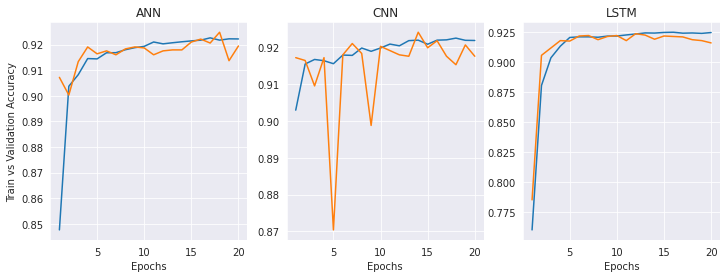

In [53]:
plt.figure(figsize=(12, 4))
plt.subplot(1,3,1)
plt.plot(epochs, hist1.history['accuracy'])
plt.plot(epochs, hist1.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Train vs Validation Accuracy')
plt.title('ANN')
# plt.legend()
plt.subplot(1,3,2)
plt.plot(epochs, hist2.history['accuracy'])
plt.plot(epochs, hist2.history['val_accuracy'])
plt.xlabel('Epochs')
plt.title('CNN')
# plt.ylabel('Train vs Validation Accuracy')
# plt.legend()
plt.subplot(1,3,3)
plt.plot(epochs, hist3.history['accuracy'])
plt.plot(epochs, hist3.history['val_accuracy'])
plt.xlabel('Epochs')
plt.title('LSTM')
plt.savefig('result/train_validation_accuracy_compare.jpg')

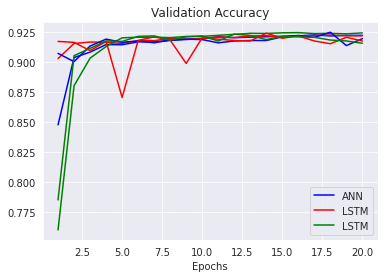

In [63]:
plt.figure(figsize=(6, 4))
plt.plot(epochs, hist1.history['accuracy'], color='blue', label='ANN')
plt.plot(epochs, hist2.history['accuracy'], color='red', label='LSTM')
plt.plot(epochs, hist3.history['accuracy'], color='green',label='LSTM')
plt.plot(epochs, hist1.history['val_accuracy'], color='blue')
plt.plot(epochs, hist2.history['val_accuracy'], color='red')
plt.plot(epochs, hist3.history['val_accuracy'], color='green')
plt.legend()
plt.xlabel('Epochs')
plt.title('Validation Accuracy')
plt.savefig('result/train_validation_single.jpg')

# Demographics model

In [81]:
# Define ann model
def ann_model_demo():
    ann = Sequential()
    ann.add(Input(shape=(X_train_demographics.shape[1], )))
    ann.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    ann.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    ann.add(Dense(1, activation='sigmoid'))
    # compile the model
    ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return ann

# define cnn model
def cnn_model_demo():
    cnn = Sequential()
    cnn.add(Input(shape=(X_train_demographics.shape[1], 1)))
    cnn.add(Conv1D(8, kernel_size=2, activation='relu'))
    cnn.add(BatchNormalization())
    cnn.add(AveragePooling1D(2))
    cnn.add(Conv1D(16, kernel_size=2, activation='relu'))
    cnn.add(BatchNormalization())
    cnn.add(AveragePooling1D(2))
    cnn.add(Flatten())
    cnn.add(Dense(64,  activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    cnn.add(Dense(32,  activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    cnn.add(Dense(1,  activation='sigmoid'))
    # compile the model
    cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return cnn

# define lstm model
def lstm_model_demo():
    lstm = Sequential()
    lstm.add(Input(shape=(X_train_demographics.shape[1], 1)))
    lstm.add(LSTM(25, activation='relu', input_shape=(X_train_clicks.shape[1],1),return_sequences=True))
    lstm.add(LSTM(10, activation='relu', return_sequences=False))
    lstm.add(Dense(1, activation='sigmoid'))
    # compile the model
    lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return lstm

In [82]:
result = result.iloc[:6,:]

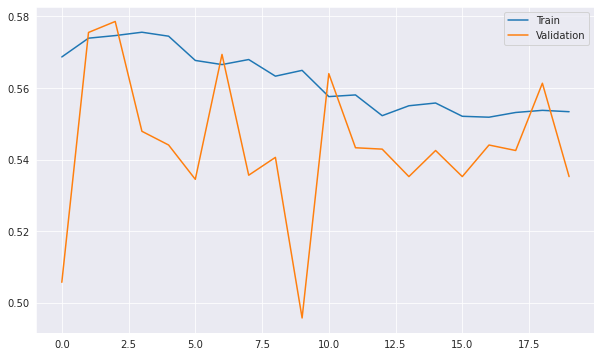

Accuracy:  0.6073017333946924
              precision    recall  f1-score   support

           0       0.67      0.62      0.64      3746
           1       0.53      0.59      0.56      2773

    accuracy                           0.61      6519
   macro avg       0.60      0.61      0.60      6519
weighted avg       0.61      0.61      0.61      6519



,accuracy,f1-score,model,precision,recall,support
0,0.921154,0.921238,ANN,0.873329,0.974708,3084.0
1,0.921154,0.921069,ANN,0.974651,0.873071,3435.0
0,0.921767,0.921971,CNN,0.875363,0.973820,3094.0
1,0.921767,0.921563,CNN,0.973676,0.874745,3425.0
0,0.921000,0.920586,LSTM,0.867228,0.980940,3043.0
1,0.921000,0.921410,LSTM,0.981150,0.868527,3476.0
0,0.607302,0.643851,ANN_DM,0.672284,0.617726,3746.0
1,0.607302,0.562393,ANN_DM,0.534612,0.593220,2773.0


In [83]:
# model based on only demographics
path = 'model/ann_model_demo.h5'
callback = ModelCheckpoint(path, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

ann = ann_model_demo()
hist4 = ann.fit(X_train_demographics, y_train, validation_split=0.1, epochs=20, batch_size=30, verbose=0, callbacks=[callback])
visualize_loss(hist4)

# predict
ann.load_weights(path)
predict = ann.predict(X_test_demographics)
predict4 = np.where(predict>0.5, 1, 0)
print('Accuracy: ', accuracy_score(predict4, y_test))
print(classification_report(predict4, y_test))

# store in dataframe
r = pd.DataFrame(classification_report(predict4, y_test,output_dict=True)).T
r['accuracy'] = r.loc['accuracy', 'precision']
r = r.iloc[:2, :]
r['model'] = 'ANN_DM'

result = pd.concat([result, r])
result

# CNN

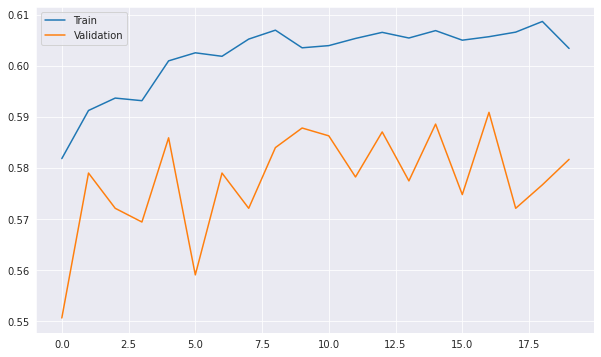

Accuracy:  0.6057677557907655
              precision    recall  f1-score   support

           0       0.76      0.60      0.67      4380
           1       0.43      0.62      0.51      2139

    accuracy                           0.61      6519
   macro avg       0.60      0.61      0.59      6519
weighted avg       0.65      0.61      0.62      6519



,accuracy,f1-score,model,precision,recall,support
0,0.921154,0.921238,ANN,0.873329,0.974708,3084.0
1,0.921154,0.921069,ANN,0.974651,0.873071,3435.0
0,0.921767,0.921971,CNN,0.875363,0.973820,3094.0
1,0.921767,0.921563,CNN,0.973676,0.874745,3425.0
0,0.921000,0.920586,LSTM,0.867228,0.980940,3043.0
1,0.921000,0.921410,LSTM,0.981150,0.868527,3476.0
0,0.607302,0.643851,ANN_DM,0.672284,0.617726,3746.0
1,0.607302,0.562393,ANN_DM,0.534612,0.593220,2773.0
0,0.605768,0.671440,CNN_DM,0.762929,0.599543,4380.0
1,0.605768,0.507285,CNN_DM,0.429964,0.618513,2139.0


In [84]:
# model based on only demographics
path = 'model/cnn_model_demo.h5'
callback = ModelCheckpoint(path, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

cnn = cnn_model_demo()
hist5 = cnn.fit(X_train_demographics_2, y_train, validation_split=0.1, epochs=20, batch_size=30, verbose=0, callbacks=[callback])
visualize_loss(hist5)

# predict
cnn.load_weights(path)
predict= cnn.predict(X_test_demographics_2)
predict5 = np.where(predict>0.5, 1, 0)
print('Accuracy: ', accuracy_score(predict5, y_test))
print(classification_report(predict5, y_test))

# store classification result
r = pd.DataFrame(classification_report(predict5, y_test,output_dict=True)).T
r['accuracy'] = r.loc['accuracy', 'precision']
r = r.iloc[:2, :]
r['model'] = 'CNN_DM'

result = pd.concat([result, r])
result

# LSTM

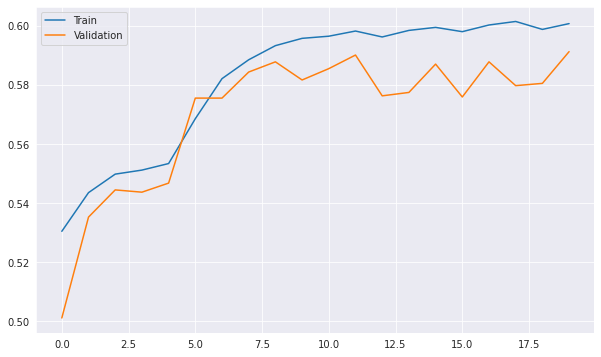

Accuracy:  0.6051541647491947
              precision    recall  f1-score   support

           0       0.68      0.61      0.64      3804
           1       0.52      0.59      0.56      2715

    accuracy                           0.61      6519
   macro avg       0.60      0.60      0.60      6519
weighted avg       0.61      0.61      0.61      6519



,accuracy,f1-score,model,precision,recall,support
0,0.921154,0.921238,ANN,0.873329,0.974708,3084.0
1,0.921154,0.921069,ANN,0.974651,0.873071,3435.0
0,0.921767,0.921971,CNN,0.875363,0.973820,3094.0
1,0.921767,0.921563,CNN,0.973676,0.874745,3425.0
0,0.921000,0.920586,LSTM,0.867228,0.980940,3043.0
1,0.921000,0.921410,LSTM,0.981150,0.868527,3476.0
0,0.607302,0.643851,ANN_DM,0.672284,0.617726,3746.0
1,0.607302,0.562393,ANN_DM,0.534612,0.593220,2773.0
0,0.605768,0.671440,CNN_DM,0.762929,0.599543,4380.0
1,0.605768,0.507285,CNN_DM,0.429964,0.618513,2139.0


In [85]:
# model based on only demographics
path = 'model/lstm_model_demo.h5'
callback = ModelCheckpoint(path, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

lstm = lstm_model_demo()
hist6 = lstm.fit(X_train_demographics_2, y_train, validation_split=0.1, epochs=20, batch_size=30, verbose=0, callbacks=[callback])
visualize_loss(hist6)

# predict
lstm.load_weights(path)
predict = lstm.predict(X_test_demographics_2)
predict6 = np.where(predict>0.5, 1, 0)
print('Accuracy: ', accuracy_score(predict6, y_test))
print(classification_report(predict6, y_test))

# store and concat with result
r = pd.DataFrame(classification_report(predict6, y_test,output_dict=True)).T
r['accuracy'] = r.loc['accuracy', 'precision']
r = r.iloc[:2, :]
r['model'] = 'LSTM_DM'

result = pd.concat([result, r])
result

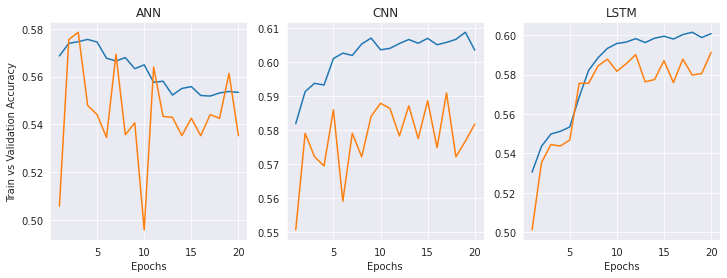

In [87]:
plt.figure(figsize=(12, 4))
plt.subplot(1,3,1)
plt.plot(epochs, hist4.history['accuracy'])
plt.plot(epochs, hist4.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Train vs Validation Accuracy')
plt.title('ANN')

plt.subplot(1,3,2)
plt.plot(epochs, hist5.history['accuracy'])
plt.plot(epochs, hist5.history['val_accuracy'])
plt.xlabel('Epochs')
plt.title('CNN')

plt.subplot(1,3,3)
plt.plot(epochs, hist6.history['accuracy'])
plt.plot(epochs, hist6.history['val_accuracy'])
plt.xlabel('Epochs')
plt.title('LSTM')
plt.savefig('result/train_validation_accuracy_compare_demographics.jpg')

<br> <br>
# combine clicks and demographics
<br> <br>

In [121]:
result = result.iloc[:12, :]

# Concatenate last two later output

In [122]:
# Define model
def define_combine_model():
    input1 = Input(shape=(X_train_clicks.shape[1], 1))
    x1 = Conv1D(16, kernel_size=2, activation='relu')(input1)
    x1 = BatchNormalization()(x1)
    x1 = AveragePooling1D(2)(x1)
    x1 = Conv1D(32, kernel_size=2, activation='relu')(x1)
    x1 = BatchNormalization()(x1)
    x1 = AveragePooling1D(2)(x1)
    x1 = Flatten()(x1)
    x1 = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01) )(x1)
    x1 = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x1)
    x1 = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x1)
    x1 = Dense(3, activation='relu')(x1)

    input2 = Input(shape=(X_train_demographics.shape[1], ))
    x2 = Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01))(input2)
    x2 = Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x2)
    x2 = Dense(3, activation='relu', )(x2)

    out1 = Concatenate()([x1, x2])
    out = Dense(1, activation='sigmoid')(out1)

    combine_model = Model(inputs=[input1, input2], outputs=out)

    combine_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return combine_model

def define_combine_model2():
    input1 = Input(shape=(X_train_clicks.shape[1], 1))
    x1 = Conv1D(16, kernel_size=2, activation='relu')(input1)
    x1 = BatchNormalization()(x1)
    x1 = AveragePooling1D(2)(x1)
    x1 = Conv1D(32, kernel_size=2, activation='relu')(x1)
    x1 = BatchNormalization()(x1)
    x1 = AveragePooling1D(2)(x1)
    x1 = Flatten()(x1)
    x1 = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01) )(x1)
    x1 = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x1)
    x1 = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x1)
    x1 = Dense(1, activation='relu')(x1)

    input2 = Input(shape=(X_train_demographics.shape[1], ))
    x2 = Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01))(input2)
    x2 = Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x2)
    x2 = Dense(1, activation='relu')(x2)

    out1 = Concatenate()([x1, x2])
    out = Dense(1, activation='sigmoid')(out1)

    combine_model = Model(inputs=[input1, input2], outputs=out)

    combine_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return combine_model

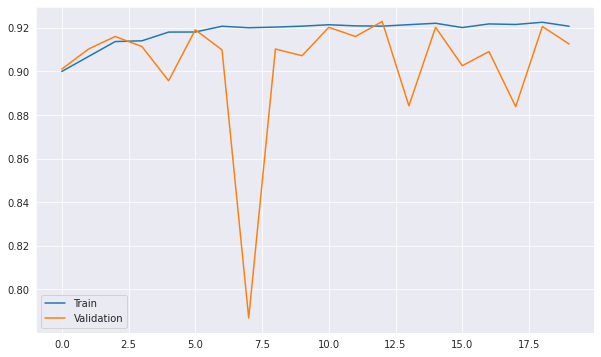


Accuracy:  0.9225341310016874
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      3047
           1       0.98      0.87      0.92      3472

    accuracy                           0.92      6519
   macro avg       0.93      0.93      0.92      6519
weighted avg       0.93      0.92      0.92      6519



,accuracy,f1-score,model,precision,recall,support
0,0.921154,0.921238,ANN,0.873329,0.974708,3084.0
1,0.921154,0.921069,ANN,0.974651,0.873071,3435.0
0,0.921767,0.921971,CNN,0.875363,0.973820,3094.0
1,0.921767,0.921563,CNN,0.973676,0.874745,3425.0
0,0.921000,0.920586,LSTM,0.867228,0.980940,3043.0
1,0.921000,0.921410,LSTM,0.981150,0.868527,3476.0
0,0.607302,0.643851,ANN_DM,0.672284,0.617726,3746.0
1,0.607302,0.562393,ANN_DM,0.534612,0.593220,2773.0
0,0.605768,0.671440,CNN_DM,0.762929,0.599543,4380.0
1,0.605768,0.507285,CNN_DM,0.429964,0.618513,2139.0


In [123]:
# model check point
path = 'model/combine_model1.h5'
callbacks = ModelCheckpoint(path, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

combine_model = define_combine_model()
hist7 = combine_model.fit([X_train_clicks_2, X_train_demographics], y_train,
                         validation_split=0.1, epochs=20, batch_size=32, verbose=0, callbacks=[callbacks])
visualize_loss(hist7)

combine_model.load_weights(path)
predict = combine_model.predict([X_test_clicks_2, X_test_demographics])
predict7 = np.where(predict>0.5, 1, 0)
print()
print('Accuracy: ', accuracy_score(predict7, y_test))
print(classification_report(predict7, y_test))

# store in dataframe
r = pd.DataFrame(classification_report(predict7, y_test,output_dict=True)).T
r['accuracy'] = r.loc['accuracy', 'precision']
r = r.iloc[:2, :]
r['model'] = 'CNN_CM_c3'

result = pd.concat([result, r])
result

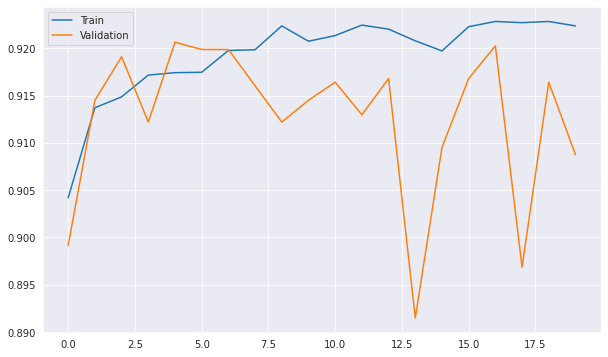


Accuracy:  0.9190059825126553
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2996
           1       0.99      0.86      0.92      3523

    accuracy                           0.92      6519
   macro avg       0.92      0.92      0.92      6519
weighted avg       0.93      0.92      0.92      6519



,accuracy,f1-score,model,precision,recall,support
0,0.921154,0.921238,ANN,0.873329,0.974708,3084.0
1,0.921154,0.921069,ANN,0.974651,0.873071,3435.0
0,0.921767,0.921971,CNN,0.875363,0.973820,3094.0
1,0.921767,0.921563,CNN,0.973676,0.874745,3425.0
0,0.921000,0.920586,LSTM,0.867228,0.980940,3043.0
1,0.921000,0.921410,LSTM,0.981150,0.868527,3476.0
0,0.607302,0.643851,ANN_DM,0.672284,0.617726,3746.0
1,0.607302,0.562393,ANN_DM,0.534612,0.593220,2773.0
0,0.605768,0.671440,CNN_DM,0.762929,0.599543,4380.0
1,0.605768,0.507285,CNN_DM,0.429964,0.618513,2139.0


In [124]:
# model check point
path = 'model/combine_model2.h5'
callbacks = ModelCheckpoint(path, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

combine_model = define_combine_model2()
hist8 = combine_model.fit([X_train_clicks_2, X_train_demographics], y_train,
                         validation_split=0.1, epochs=20, batch_size=32, verbose=0, callbacks=[callbacks])
visualize_loss(hist8)

combine_model.load_weights(path)
predict = combine_model.predict([X_test_clicks_2, X_test_demographics])
predict7 = np.where(predict>0.5, 1, 0)
print()
print('Accuracy: ', accuracy_score(predict7, y_test))
print(classification_report(predict7, y_test))

# store in dataframe
r = pd.DataFrame(classification_report(predict7, y_test,output_dict=True)).T
r['accuracy'] = r.loc['accuracy', 'precision']
r = r.iloc[:2, :]
r['model'] = 'CNN_CM_C1'

result = pd.concat([result, r])
result

# Add last two layer outputs

In [125]:
# Define model
def define_combine_model_add():
    input1 = Input(shape=(X_train_clicks.shape[1], 1))
    x1 = Conv1D(16, kernel_size=2, activation='relu')(input1)
    x1 = BatchNormalization()(x1)
    x1 = AveragePooling1D(2)(x1)
    x1 = Conv1D(32, kernel_size=2, activation='relu')(x1)
    x1 = BatchNormalization()(x1)
    x1 = AveragePooling1D(2)(x1)
    x1 = Flatten()(x1)
    x1 = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01) )(x1)
    x1 = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x1)
    x1 = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x1)
    x1 = Dense(3, activation='relu')(x1)

    input2 = Input(shape=(X_train_demographics.shape[1], ))
    x2 = Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01))(input2)
    x2 = Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x2)
    x2 = Dense(3, activation='relu', )(x2)

    out1 = Add()([x1, x2])
    out = Dense(1, activation='sigmoid')(out1)

    combine_model = Model(inputs=[input1, input2], outputs=out)

    combine_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return combine_model

def define_combine_model_2_add():
    input1 = Input(shape=(X_train_clicks.shape[1], 1))
    x1 = Conv1D(16, kernel_size=2, activation='relu')(input1)
    x1 = BatchNormalization()(x1)
    x1 = AveragePooling1D(2)(x1)
    x1 = Conv1D(32, kernel_size=2, activation='relu')(x1)
    x1 = BatchNormalization()(x1)
    x1 = AveragePooling1D(2)(x1)
    x1 = Flatten()(x1)
    x1 = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01) )(x1)
    x1 = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x1)
    x1 = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x1)
    x1 = Dense(1, activation='relu')(x1)

    input2 = Input(shape=(X_train_demographics.shape[1], ))
    x2 = Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01))(input2)
    x2 = Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x2)
    x2 = Dense(1, activation='relu')(x2)

    out1 = Add()([x1, x2])
    out = sigmoid(out1)

    combine_model = Model(inputs=[input1, input2], outputs=out)

    combine_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return combine_model

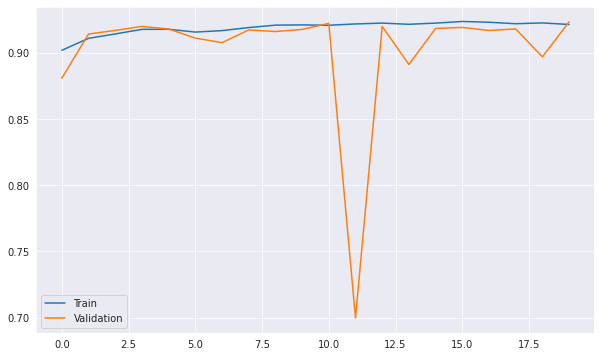


Accuracy:  0.9229943242828654
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      3054
           1       0.98      0.87      0.92      3465

    accuracy                           0.92      6519
   macro avg       0.93      0.93      0.92      6519
weighted avg       0.93      0.92      0.92      6519



,accuracy,f1-score,model,precision,recall,support
0,0.921154,0.921238,ANN,0.873329,0.974708,3084.0
1,0.921154,0.921069,ANN,0.974651,0.873071,3435.0
0,0.921767,0.921971,CNN,0.875363,0.973820,3094.0
1,0.921767,0.921563,CNN,0.973676,0.874745,3425.0
0,0.921000,0.920586,LSTM,0.867228,0.980940,3043.0
1,0.921000,0.921410,LSTM,0.981150,0.868527,3476.0
0,0.607302,0.643851,ANN_DM,0.672284,0.617726,3746.0
1,0.607302,0.562393,ANN_DM,0.534612,0.593220,2773.0
0,0.605768,0.671440,CNN_DM,0.762929,0.599543,4380.0
1,0.605768,0.507285,CNN_DM,0.429964,0.618513,2139.0


In [126]:
# model check point
path = 'model/combine_model3.h5'
callbacks = ModelCheckpoint(path, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

combine_model = define_combine_model_add()
hist7 = combine_model.fit([X_train_clicks_2, X_train_demographics], y_train,
                         validation_split=0.1, epochs=20, batch_size=32, verbose=0, callbacks=[callbacks])
visualize_loss(hist7)

combine_model.load_weights(path)
predict = combine_model.predict([X_test_clicks_2, X_test_demographics])
predict7 = np.where(predict>0.5, 1, 0)
print()
print('Accuracy: ', accuracy_score(predict7, y_test))
print(classification_report(predict7, y_test))

# store in dataframe
r = pd.DataFrame(classification_report(predict7, y_test,output_dict=True)).T
r['accuracy'] = r.loc['accuracy', 'precision']
r = r.iloc[:2, :]
r['model'] = 'CNN_CM_A3'

result = pd.concat([result, r])
result

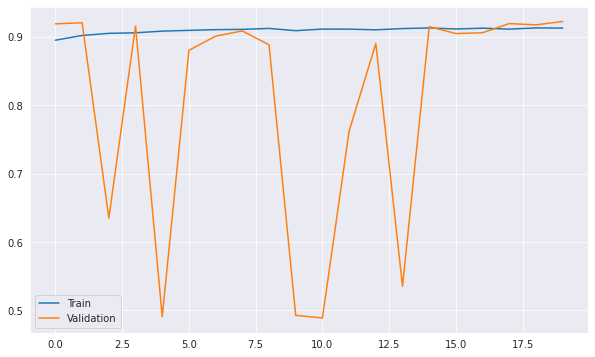


Accuracy:  0.9196195735542261
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      3002
           1       0.99      0.86      0.92      3517

    accuracy                           0.92      6519
   macro avg       0.92      0.92      0.92      6519
weighted avg       0.93      0.92      0.92      6519



,accuracy,f1-score,model,precision,recall,support
0,0.921154,0.921238,ANN,0.873329,0.974708,3084.0
1,0.921154,0.921069,ANN,0.974651,0.873071,3435.0
0,0.921767,0.921971,CNN,0.875363,0.973820,3094.0
1,0.921767,0.921563,CNN,0.973676,0.874745,3425.0
0,0.921000,0.920586,LSTM,0.867228,0.980940,3043.0
1,0.921000,0.921410,LSTM,0.981150,0.868527,3476.0
0,0.607302,0.643851,ANN_DM,0.672284,0.617726,3746.0
1,0.607302,0.562393,ANN_DM,0.534612,0.593220,2773.0
0,0.605768,0.671440,CNN_DM,0.762929,0.599543,4380.0
1,0.605768,0.507285,CNN_DM,0.429964,0.618513,2139.0


In [127]:
# model check point
path = 'model/combine_model4.h5'
callbacks = ModelCheckpoint(path, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

combine_model = define_combine_model_2_add()
hist7 = combine_model.fit([X_train_clicks_2, X_train_demographics], y_train,
                         validation_split=0.1, epochs=20, batch_size=32, verbose=0, callbacks=[callbacks])
visualize_loss(hist7)

combine_model.load_weights(path)
predict = combine_model.predict([X_test_clicks_2, X_test_demographics])
predict7 = np.where(predict>0.5, 1, 0)
print()
print('Accuracy: ', accuracy_score(predict7, y_test))
print(classification_report(predict7, y_test))

# store in dataframe
r = pd.DataFrame(classification_report(predict7, y_test,output_dict=True)).T
r['accuracy'] = r.loc['accuracy', 'precision']
r = r.iloc[:2, :]
r['model'] = 'CNN_CM_A1'

result = pd.concat([result, r])
result

# LSTM and ANN

In [128]:
def define_combine_model3():
    input1 = Input(shape=(X_train_clicks.shape[1], 1))
    x1 = LSTM(25, activation='relu', return_sequences=True, kernel_regularizer=regularizers.l2(0.01))(input1)
    x1 = LSTM(25, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x1)
    x1 = Dense(3, activation='relu')(x1)

    input2 = Input(shape=(X_train_demographics.shape[1], ))
    x2 = Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01))(input2)
    x2 = Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x2)
    x2 = Dense(3, activation='relu')(x2)

    out1 = Concatenate()([x1, x2])
    out = Dense(1, activation='sigmoid')(out1)

    combine_model = Model(inputs=[input1, input2], outputs=out)

    combine_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return combine_model

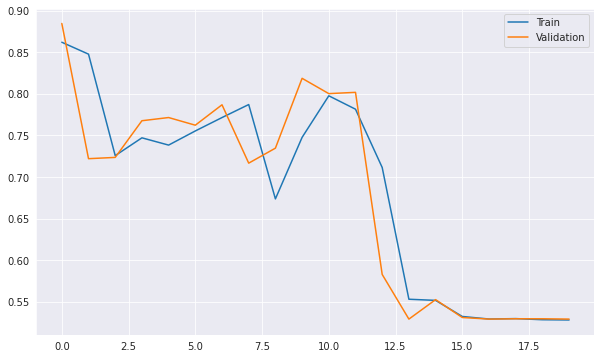


Accuracy:  0.8794293603313391
              precision    recall  f1-score   support

           0       0.79      0.98      0.87      2756
           1       0.98      0.80      0.89      3763

    accuracy                           0.88      6519
   macro avg       0.88      0.89      0.88      6519
weighted avg       0.90      0.88      0.88      6519



,accuracy,f1-score,model,precision,recall,support
0,0.921154,0.921238,ANN,0.873329,0.974708,3084.0
1,0.921154,0.921069,ANN,0.974651,0.873071,3435.0
0,0.921767,0.921971,CNN,0.875363,0.973820,3094.0
1,0.921767,0.921563,CNN,0.973676,0.874745,3425.0
0,0.921000,0.920586,LSTM,0.867228,0.980940,3043.0
1,0.921000,0.921410,LSTM,0.981150,0.868527,3476.0
0,0.607302,0.643851,ANN_DM,0.672284,0.617726,3746.0
1,0.607302,0.562393,ANN_DM,0.534612,0.593220,2773.0
0,0.605768,0.671440,CNN_DM,0.762929,0.599543,4380.0
1,0.605768,0.507285,CNN_DM,0.429964,0.618513,2139.0


In [129]:
# model check point
path = 'model/combine_model3.h5'
callbacks = ModelCheckpoint(path, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

combine_model = define_combine_model3()
hist8 = combine_model.fit([X_train_clicks_2, X_train_demographics], y_train,
                         validation_split=0.1, epochs=20, batch_size=32, verbose=0, callbacks=[callbacks])
visualize_loss(hist8)

combine_model.load_weights(path)
predict = combine_model.predict([X_test_clicks_2, X_test_demographics])
predict7 = np.where(predict>0.5, 1, 0)
print()
print('Accuracy: ', accuracy_score(predict7, y_test))
print(classification_report(predict7, y_test))

# store in dataframe
r = pd.DataFrame(classification_report(predict7, y_test,output_dict=True)).T
r['accuracy'] = r.loc['accuracy', 'precision']
r = r.iloc[:2, :]
r['model'] = 'CNN_CM_l'

result = pd.concat([result, r])
result

In [134]:
dd =result[result[['accuracy', 'model']].duplicated()]
dd

,accuracy,f1-score,model,precision,recall,support
1,0.921154,0.921069,ANN,0.974651,0.873071,3435.0
1,0.921767,0.921563,CNN,0.973676,0.874745,3425.0
1,0.921000,0.921410,LSTM,0.981150,0.868527,3476.0
1,0.607302,0.562393,ANN_DM,0.534612,0.593220,2773.0
1,0.605768,0.507285,CNN_DM,0.429964,0.618513,2139.0
1,0.605154,0.555594,LSTM_DM,0.522912,0.592634,NaN
1,0.922534,0.922889,CNN_CM_c3,0.982125,0.870392,3472.0
1,0.919006,0.920000,CNN_CM_C1,0.986675,0.861766,3523.0
1,0.922994,0.923265,CNN_CM_A3,0.981475,0.871573,3465.0
1,0.919620,0.920534,CNN_CM_A1,0.986350,0.862951,3517.0


<AxesSubplot:>

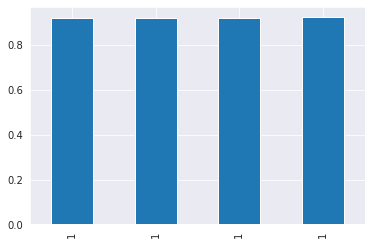

In [136]:
dd.iloc[[0,1,2,8], :]['accuracy'].plot(kind='bar')